# Prediction of Churn rate of the Customers of Telecom company using Machine Learning Algorithms!

# _Business Context :_

### _This case requires trainees to develop a model for predicting customer churn at a fictitious wireless telecom company and use insights from the model to develop an incentive plan for enticing would-be churners to remain with company. Data for the case are available in csv format. The data are a scaled down version of the full database generously donated by an anonymous wireless telephone company. There are still 7043 customers in the database, and 20 potential predictors._

### _Candidates can use whatever method they wish to develop their machine learning model. The data are available in one data file with 7043 rows that combines the calibration and validation customers. “Calibration” database consisting of 4000 customers and a “validation” database consisting of 3043 customers. Each database contained (1) a “churn” variable signifying whether the customer had left the company two months after observation, and (2) a set of 20 potential predictor variables that could be used in a predictive churn model._

### _Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. I recommend you spend much time on both fine-tuning and interpreting results of your machine learning model_

---

# _Now, what i will be doing in this Project :_

- Data cleaning including missing values, outliers and multi-collinearity.


- Describing my predictive churn model in elaboration.


- selecting variables to be included in the model.


- Demonstrating the performance of the model by using best set of tools.


- Making sure of the key factors that predict customer churn


- And try to figure out about if these factors make sense


- What kind of offers should be avail to customers to encourage them to remain with company?


- And at last, after the actions have been implemented,determining if they work?

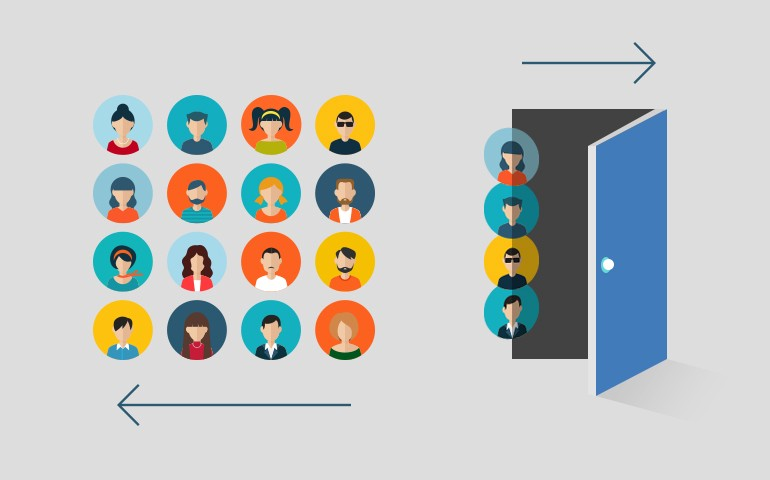

---

## _Importing Libraries:_

In [2]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

## _Loading the Dataset:_

In [6]:
df=pd.read_excel('churn.xlsx')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

# _Data Cleaning and Preprocessing :_

## _Checking for Null values in the Dataset_

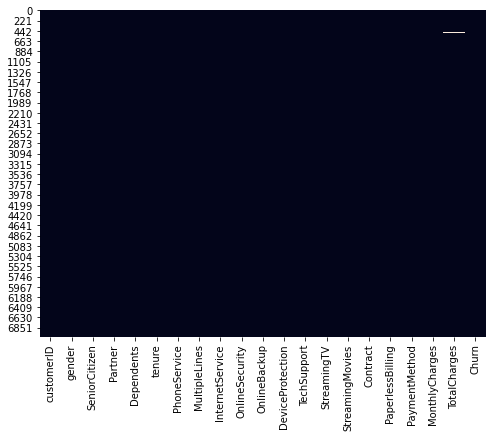

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False)
sns.set_context('talk')

As we can see that there are null values in the `TOTAL CHARGES` column

##### Dropping Null values :

In [12]:
df.dropna(inplace = True)

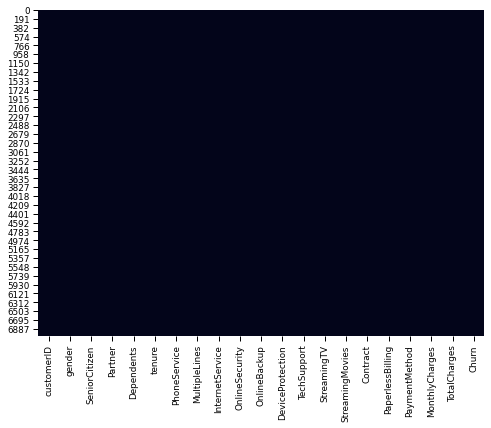

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False)
sns.set_context('paper')

In [16]:
dfn = df.copy()

In [17]:
# Dropping the CustomerID column:
dfn = dfn.iloc[:,1:]

#### _Doing one hot encoding_

In [23]:
# Making dummy variables for the corresponding categorical ones!
dfn_dummies = pd.get_dummies(dfn)

In [21]:
dfn['Churn'].replace(to_replace='Yes', value=1, inplace=True)
dfn['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [24]:
dfn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


---

# _Exploratory Data Analysis and Visualization_



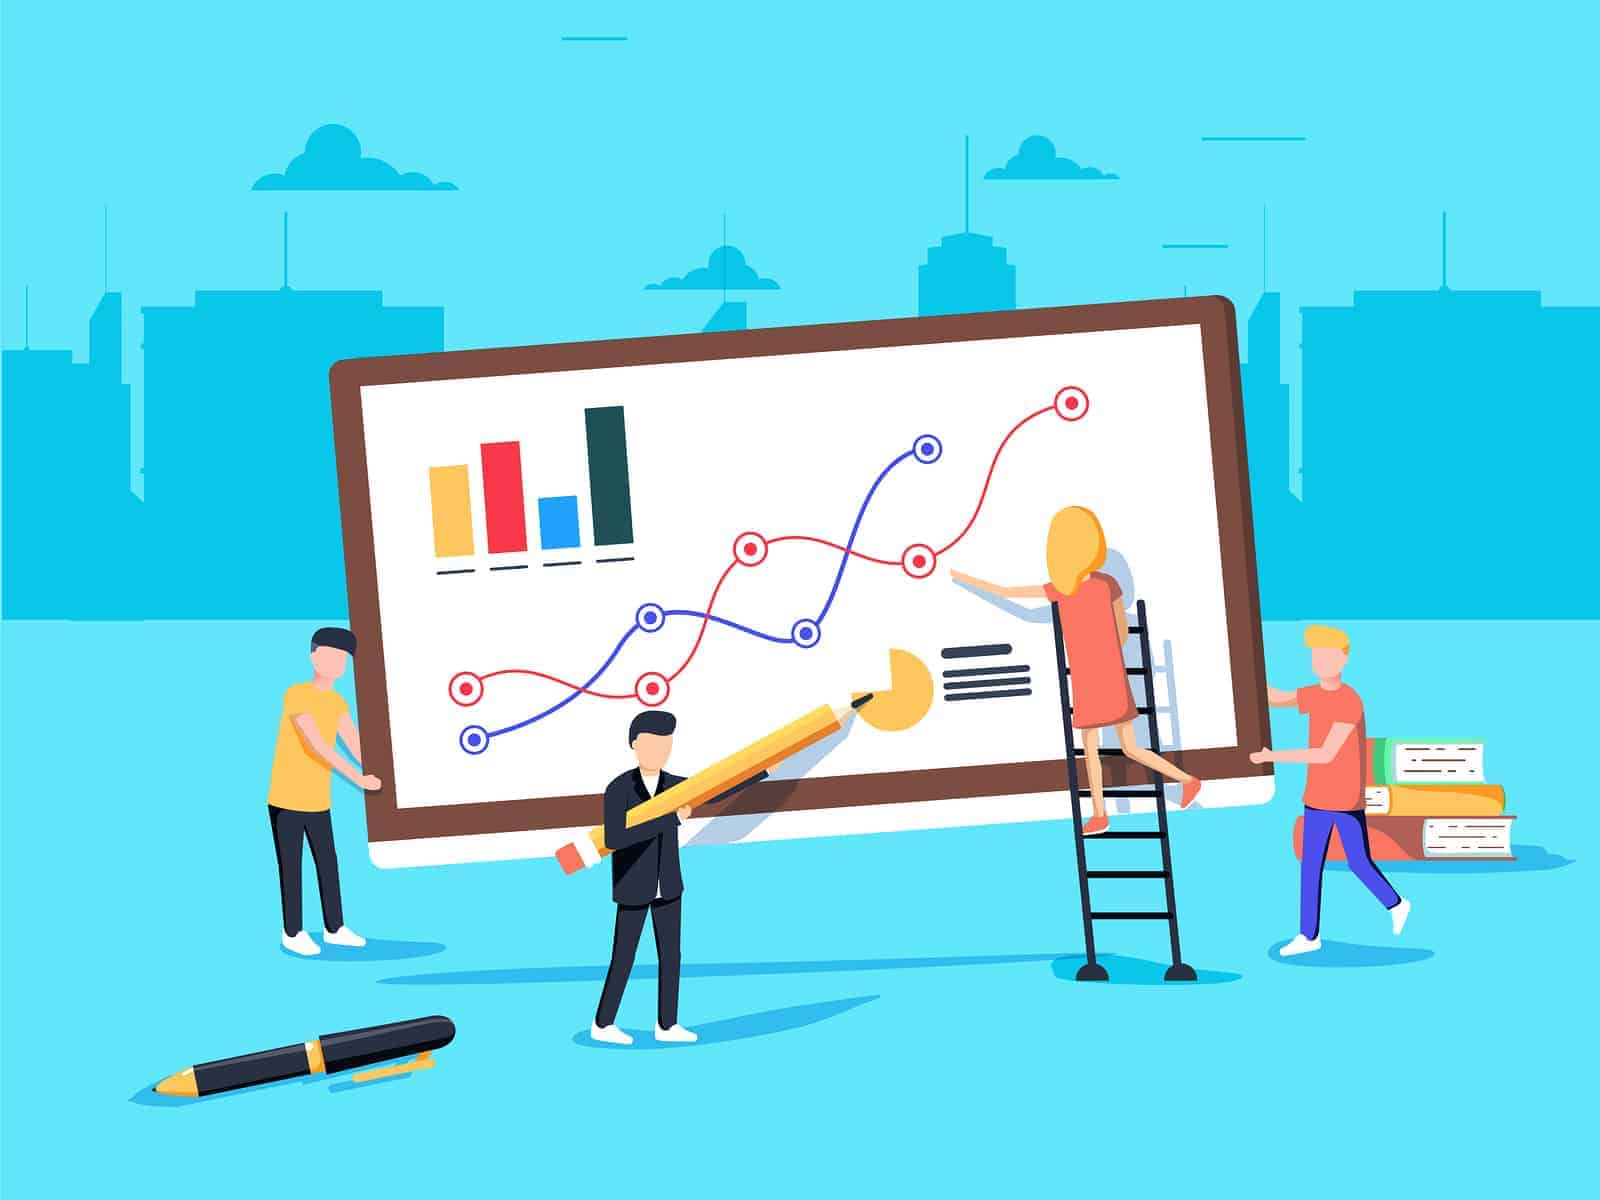

In [20]:
dfn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Text(0.5, 1.0, 'Number of Customers Churned wrt Gender')

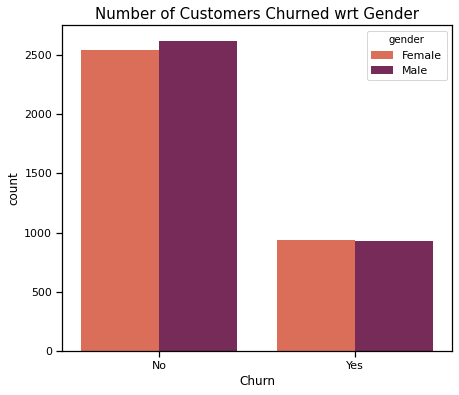

In [51]:
plt.figure(figsize=(7,6))
sns.countplot(x='Churn',data=df,hue = 'gender',palette='rocket_r')
sns.set_context('notebook')
plt.title("Number of Customers Churned wrt Gender", size =15)

## _Finding Correlation and Plotting Heatmap_

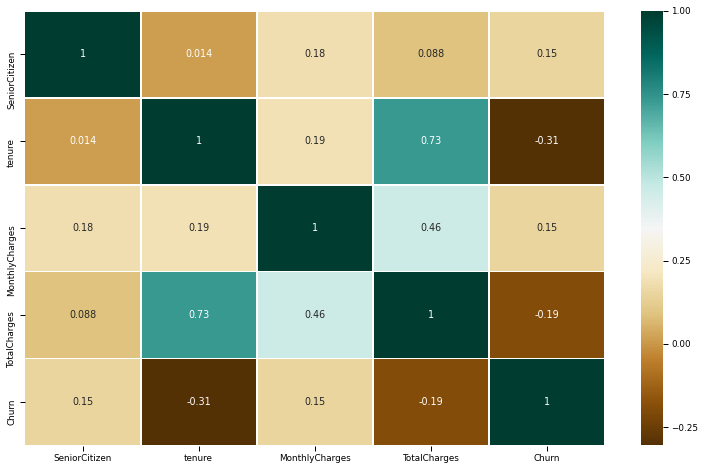

In [26]:
corr = dfn.corr(method='kendall')
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="BrBG", linewidths=.9)

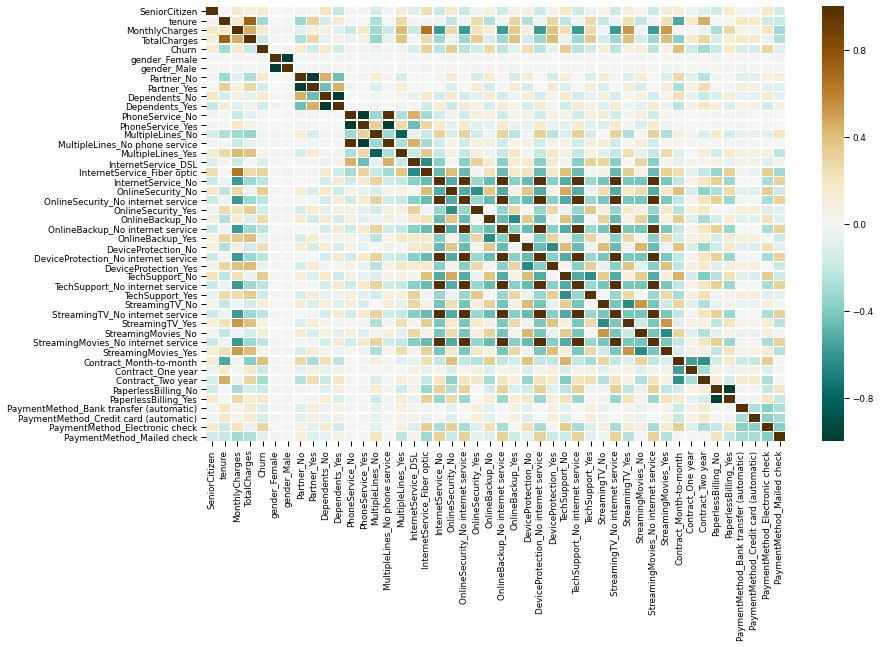

In [36]:
corr = dfn_dummies.corr(method='kendall')
plt.figure(figsize=(13,8))
sns.heatmap(corr, cmap="BrBG_r", linewidths=.4)

Text(0.5, 1.0, 'Number of Customers having multiple phone service')

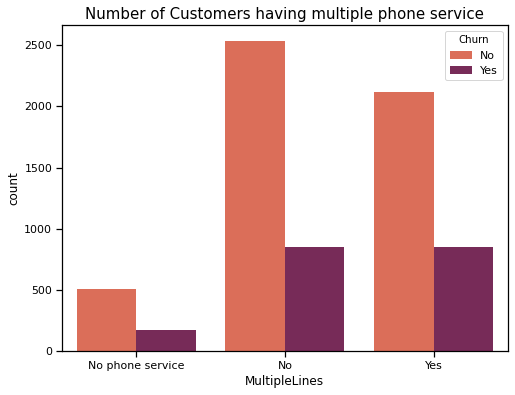

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines',data=df,hue = 'Churn', palette='rocket_r')
plt.title("Number of Customers having multiple phone service", size =15)

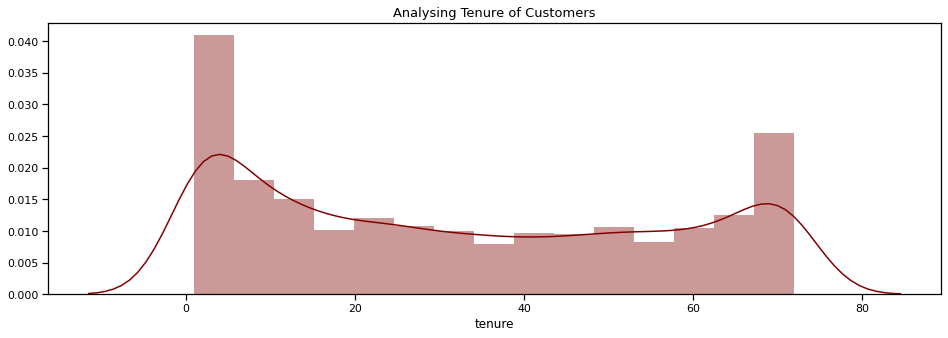

In [78]:
plt.figure(figsize=(16,5))
sns.distplot(df['tenure'], color = 'maroon')
plt.title('Analysing Tenure of Customers', size = 13)
plt.show()

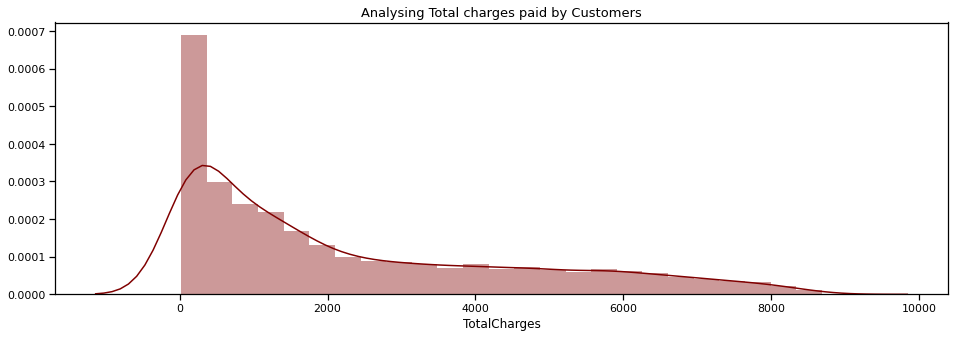

In [77]:
plt.figure(figsize=(16,5))
sns.distplot(df['TotalCharges'], color = 'maroon')
plt.title('Analysing Total charges paid by Customers', size = 13)
plt.show()

Text(0.5, 1.0, 'Customers churning over the contract period')

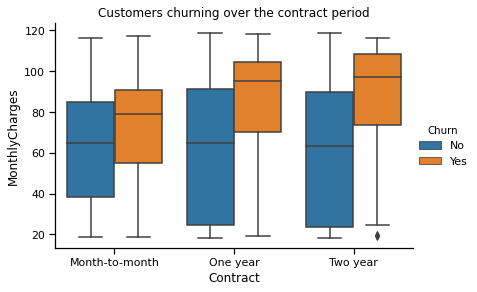

In [73]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4, aspect=1.5)
plt.title('Customers churning over the contract period')

Here, From the above Visualization we can see that the Longer contracts are more affected by higher monthly charges.

---

# _Now, for making the Prediction :_
---

## _Independent and dependent features_

In [79]:
X = dfn_dummies.drop(columns = ['Churn'])

In [80]:
y = dfn_dummies['Churn'].values

In [84]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


### _Scaling the dataset_

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

## _Train-Test Split_

In [87]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

---

# Making the Models:
---

# _Using Logistic Regression_

### Answering the `why`
Logistic regression is one of the most commonly used machine learning algorithms for binary classification problems.

Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set.

The purpose of logistic regression is to estimate the probabilities of events, including determining a relationship between features and the probabilities of particular outcomes.

The approach allows an algorithm being used in a machine learning application to classify incoming data based on historical data. As more relevant data comes in, the algorithm should get better at predicting classifications within data sets.<br>A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

---

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logreg = LogisticRegression()

In [91]:
logreg.fit(X_train, y_train)

LogisticRegression()

### _Predicting_

In [93]:
y_predict = logreg.predict(X_test)

### _Accuracy score_

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_logreg = accuracy_score(y_predict, y_test)

In [96]:
accuracy_logreg

0.8075829383886256

### _Confusion Matrix_

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
conflog= confusion_matrix(y_test, y_predict)
conflog

array([[1418,  162],
       [ 244,  286]], dtype=int64)

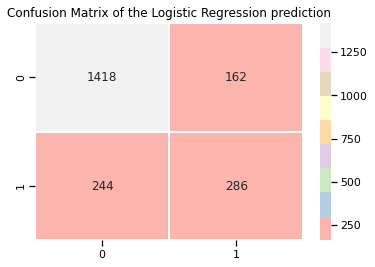

In [99]:
sns.heatmap(conflog, annot=True, cmap="Pastel1", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the Logistic Regression prediction')
plt.show()

### _Key factors which predicted customer Churn in LOGISTIC REGRESSION :_

AxesSubplot(0.125,0.125;0.775x0.755)


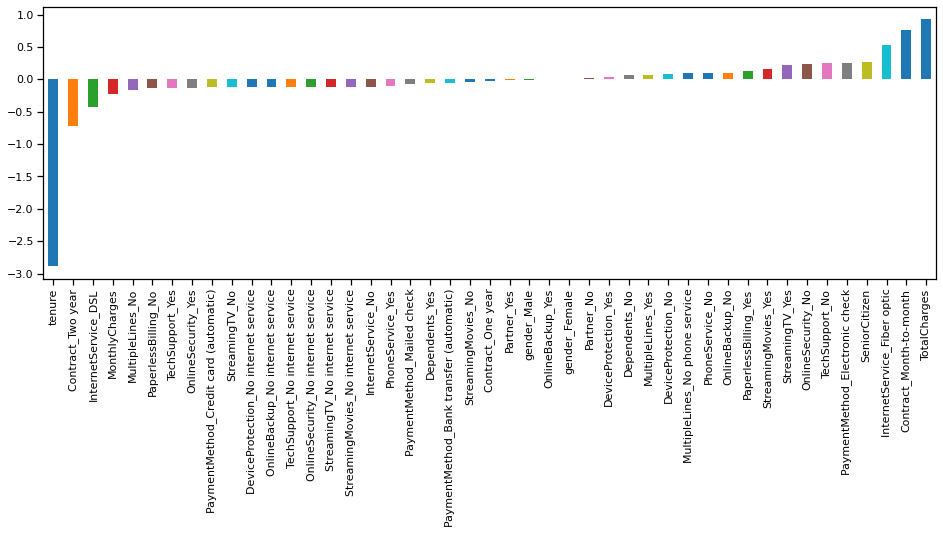

In [108]:
factors = pd.Series(logreg.coef_[0],index=X.columns.values)
plt.figure(figsize=(16,5))
print (factors.sort_values(ascending = True).plot(kind='bar'))

### `Here we can see the following key factors responsible for the churn prediction` <br><br> `and from the EDA part , we can say that yes, these factors make sense`

### `Negative relation means that likeliness of churn decreases with that variable` <br><br> `So, we should be focusing on giving offers to the customers to be with us`<br> `from the key factors only which shows a Positive relation`

### _Classification Report Logistic Regression_

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



---
---

# _Using RandomForestClassifier_

### Answering the `why`
Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity and this is why i am considering this Algorithm for this Business Context.

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the bragging method. The general idea of the bagging method is that a combination of learning models increases the overall result.

random forest just builds multiple decision trees and merges them together to get a more accurate and stable prediction.

---

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 32)

In [112]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=32, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

### _Predicting_

In [113]:
y_predrfc = rfc.predict(X_test)

### _Accuracy Score_

In [114]:
accuracy_rfc = accuracy_score(y_predrfc, y_test)

In [115]:
accuracy_rfc

0.8118483412322275

### _Confusion Matrix_

In [117]:
confrfc= confusion_matrix(y_test, y_predrfc)
confrfc

array([[1449,  131],
       [ 266,  264]], dtype=int64)

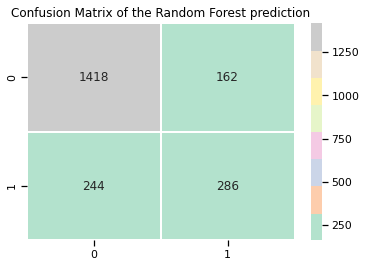

In [118]:
sns.heatmap(conflog, annot=True, cmap="Pastel2", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the Random Forest prediction')
plt.show()

## _Key factors which predicted customer Churn in RANDOM FOREST_

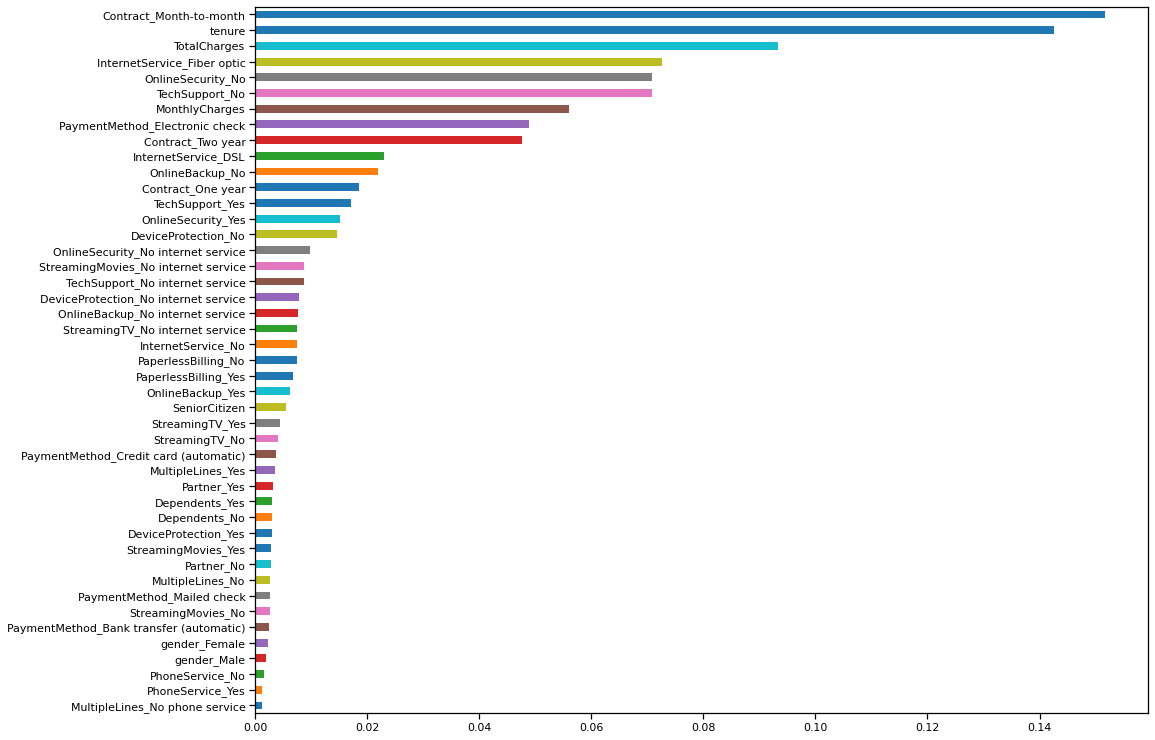

In [127]:
imp = rfc.feature_importances_
kfactors = pd.Series(imp,index=X.columns.values)
plt.figure(figsize=(16,13))
kfactors.sort_values().plot(kind = 'barh')

### `Here we can see the following key factors responsible for the churn prediction in RANDOM FOREST` <br><br> `and from the EDA part , we can say that yes, these factors make sense`

### `Contract Month_to_Month tops the important factors list` <br><br> `And from above we can make sure that the offers we give to customers`<br> `from the key factors are aligned to this prediction graph`

### _Classification Report RANDOM FOREST_

In [131]:
print(classification_report(y_test, y_predrfc))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1580
           1       0.67      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



---
---
---

# _Conclusion:_
---

### I have successfully completed the task of executing the multistage process for proactive churn management.

### I have used the variables and explained aqequately the steps which needed to.

## In the Process of Completion :
- I did Data Cleaning and Preprocessing
- Did Exploratory data Analysis
- And made interactive Visualizations

## For Prediction :
- I Trained my model based on two Machine Learning Algorithms
### Logistic Regression<br> RandomForestRegression.


- Demonstrated the performance of both of my moels using best set of tools
- And Plotted a graph to show the key factors that were responsible for the following Prediction.

## _And came to the conclusion that Random Forest Model scored slightly better than the Logistic Regression one!_

--- 
### For Determining the work: 
I am pretty sure that the given above  models with accuracy score more than 80% , these two would be able to determine the prediction if we give the required inputs, model can successfuly give out the adequate output prediction.<br><br>
Or we can just save the model and make this project an EndToEnd, that will also do.

## kind of offers should be avail to customers to encourage them to remain with the Company:
 
### _From The Analysis and Prediction done above, i can now Conclude that :_
#### _For eliminating customer churn,_
- Firstly, The company should be knowing the customer needs and that's what this project of mine focused on.
- By identifying the Customers who are at the verge of Churning, company should work for improving their satisfaction to make them stay.
- Building Customer Loyality and Improving Customer care services would be also a great thing to do!